In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import datetime

# Data Import and Cleansing

In [2]:
import glob

path = r'Downloads/Rooms/Ongoing' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df_all = pd.DataFrame()
df_all = pd.concat(li, axis=0, ignore_index=True)

In [3]:
df_all

,Unnamed: 0,capture_time,room_name,club_name,speaker_cnt,joiner_cnt,duration
0,0,02/05/2021 17:29:10,Could your life be a movie? Come share stories...,FILM TALK WITH CAT & KEL 🏠,56,407,08:27:16
1,1,02/05/2021 17:29:10,😳‼️Conversations With GOD⁉️😳,THE SECRET LAW OF ATTRACTION 🏠,1,333,07:28:42
2,2,02/05/2021 17:29:10,❤️DATING GAME + SHOOT UR SHOT w/ the Sexiest S...,SINGLE IN THE CITY 🏠,44,272,07:24:31
3,3,02/05/2021 17:29:10,TG in da house,NaN,5,261,00:27:18
4,4,02/05/2021 17:29:10,"🎼🎵 HANG DRUM with ""IMEN"" sponsored by ""ALI JULES""",MEDITATION VIBE 🏠,65,253,12:48:57
...,...,...,...,...,...,...,...
2140,50,02/05/2021 02:48:35,Soulful Saturday : Classic Soul & Classic R&B,THE PLAYLIST 🏠,2,12,02:49:25
2141,51,02/05/2021 02:48:35,VICTORY TOSO (3 HOURS) 📿🙏🏾📿 NAM MYOHO RENGE KYO,SGI BUDDHISTS ON CLUBHOUSE 🏠,3,12,02:52:02
2142,52,02/05/2021 02:48:35,"""ToTheLighthouse"": Open Meeting about Higher P...",THE 12 STEPS 🏠,7,12,00:04:27
2143,53,02/05/2021 02:48:35,Saturday chill,KAZAKHS IN TECH 🏠,9,11,01:10:39


In [4]:
df_all.sort_values(by=['capture_time']).capture_time.unique().tolist()

['02/05/2021 00:16:21',
 '02/05/2021 00:46:48',
 '02/05/2021 01:17:17',
 '02/05/2021 01:47:43',
 '02/05/2021 02:18:10',
 '02/05/2021 02:48:35',
 '02/05/2021 03:19:01',
 '02/05/2021 03:49:27',
 '02/05/2021 04:19:53',
 '02/05/2021 04:50:21',
 '02/05/2021 05:20:46',
 '02/05/2021 05:51:12',
 '02/05/2021 06:21:36',
 '02/05/2021 06:52:00',
 '02/05/2021 07:22:24',
 '02/05/2021 07:52:49',
 '02/05/2021 08:25:21',
 '02/05/2021 08:55:46',
 '02/05/2021 09:26:12',
 '02/05/2021 09:56:37',
 '02/05/2021 10:27:05',
 '02/05/2021 10:57:32',
 '02/05/2021 11:27:58',
 '02/05/2021 11:58:24',
 '02/05/2021 12:28:49',
 '02/05/2021 12:55:39',
 '02/05/2021 13:26:03',
 '02/05/2021 13:56:28',
 '02/05/2021 14:26:51',
 '02/05/2021 14:57:14',
 '02/05/2021 15:27:38',
 '02/05/2021 15:58:00',
 '02/05/2021 16:28:22',
 '02/05/2021 16:58:45',
 '02/05/2021 17:29:10',
 '02/05/2021 17:59:33',
 '02/05/2021 18:29:56',
 '02/05/2021 19:17:28',
 '02/05/2021 19:47:52',
 '02/05/2021 20:18:17',
 '02/05/2021 20:48:42',
 '02/05/2021 21:

In [5]:
df_all.sort_values(by=["capture_time"]).capture_time.nunique()

47

In [6]:
df_all['capture_time'] = pd.to_datetime(df_all['capture_time'], format="%d/%m/%Y %H:%M:%S")
del df_all["Unnamed: 0"]
df_all

,capture_time,room_name,club_name,speaker_cnt,joiner_cnt,duration
0,2021-05-02 17:29:10,Could your life be a movie? Come share stories...,FILM TALK WITH CAT & KEL 🏠,56,407,08:27:16
1,2021-05-02 17:29:10,😳‼️Conversations With GOD⁉️😳,THE SECRET LAW OF ATTRACTION 🏠,1,333,07:28:42
2,2021-05-02 17:29:10,❤️DATING GAME + SHOOT UR SHOT w/ the Sexiest S...,SINGLE IN THE CITY 🏠,44,272,07:24:31
3,2021-05-02 17:29:10,TG in da house,NaN,5,261,00:27:18
4,2021-05-02 17:29:10,"🎼🎵 HANG DRUM with ""IMEN"" sponsored by ""ALI JULES""",MEDITATION VIBE 🏠,65,253,12:48:57
...,...,...,...,...,...,...
2140,2021-05-02 02:48:35,Soulful Saturday : Classic Soul & Classic R&B,THE PLAYLIST 🏠,2,12,02:49:25
2141,2021-05-02 02:48:35,VICTORY TOSO (3 HOURS) 📿🙏🏾📿 NAM MYOHO RENGE KYO,SGI BUDDHISTS ON CLUBHOUSE 🏠,3,12,02:52:02
2142,2021-05-02 02:48:35,"""ToTheLighthouse"": Open Meeting about Higher P...",THE 12 STEPS 🏠,7,12,00:04:27
2143,2021-05-02 02:48:35,Saturday chill,KAZAKHS IN TECH 🏠,9,11,01:10:39


In [7]:
df_all['capture_time_pst'] = df_all.capture_time.dt.tz_localize("Asia/Singapore").dt.tz_convert('America/Los_Angeles')
df_all

,capture_time,room_name,club_name,speaker_cnt,joiner_cnt,duration,capture_time_pst
0,2021-05-02 17:29:10,Could your life be a movie? Come share stories...,FILM TALK WITH CAT & KEL 🏠,56,407,08:27:16,2021-05-02 02:29:10-07:00
1,2021-05-02 17:29:10,😳‼️Conversations With GOD⁉️😳,THE SECRET LAW OF ATTRACTION 🏠,1,333,07:28:42,2021-05-02 02:29:10-07:00
2,2021-05-02 17:29:10,❤️DATING GAME + SHOOT UR SHOT w/ the Sexiest S...,SINGLE IN THE CITY 🏠,44,272,07:24:31,2021-05-02 02:29:10-07:00
3,2021-05-02 17:29:10,TG in da house,NaN,5,261,00:27:18,2021-05-02 02:29:10-07:00
4,2021-05-02 17:29:10,"🎼🎵 HANG DRUM with ""IMEN"" sponsored by ""ALI JULES""",MEDITATION VIBE 🏠,65,253,12:48:57,2021-05-02 02:29:10-07:00
...,...,...,...,...,...,...,...
2140,2021-05-02 02:48:35,Soulful Saturday : Classic Soul & Classic R&B,THE PLAYLIST 🏠,2,12,02:49:25,2021-05-01 11:48:35-07:00
2141,2021-05-02 02:48:35,VICTORY TOSO (3 HOURS) 📿🙏🏾📿 NAM MYOHO RENGE KYO,SGI BUDDHISTS ON CLUBHOUSE 🏠,3,12,02:52:02,2021-05-01 11:48:35-07:00
2142,2021-05-02 02:48:35,"""ToTheLighthouse"": Open Meeting about Higher P...",THE 12 STEPS 🏠,7,12,00:04:27,2021-05-01 11:48:35-07:00
2143,2021-05-02 02:48:35,Saturday chill,KAZAKHS IN TECH 🏠,9,11,01:10:39,2021-05-01 11:48:35-07:00


In [8]:
def get_time_of_day_group (row):
    if row['capture_time_pst'].hour < 6:
        return "dawn"
    elif row['capture_time_pst'].hour >= 6 and row['capture_time'].hour < 12:
        return "morning"
    elif row['capture_time_pst'].hour >= 12 and row['capture_time'].hour < 17:
        return "afternoon"
    elif row['capture_time_pst'].hour >= 17 :
        return "evening"
    else:
        return np.nan

In [9]:
df_all['time_of_day_group'] = df_all.apply (lambda row: get_time_of_day_group(row), axis=1)
df_all

,capture_time,room_name,club_name,speaker_cnt,joiner_cnt,duration,capture_time_pst,time_of_day_group
0,2021-05-02 17:29:10,Could your life be a movie? Come share stories...,FILM TALK WITH CAT & KEL 🏠,56,407,08:27:16,2021-05-02 02:29:10-07:00,dawn
1,2021-05-02 17:29:10,😳‼️Conversations With GOD⁉️😳,THE SECRET LAW OF ATTRACTION 🏠,1,333,07:28:42,2021-05-02 02:29:10-07:00,dawn
2,2021-05-02 17:29:10,❤️DATING GAME + SHOOT UR SHOT w/ the Sexiest S...,SINGLE IN THE CITY 🏠,44,272,07:24:31,2021-05-02 02:29:10-07:00,dawn
3,2021-05-02 17:29:10,TG in da house,NaN,5,261,00:27:18,2021-05-02 02:29:10-07:00,dawn
4,2021-05-02 17:29:10,"🎼🎵 HANG DRUM with ""IMEN"" sponsored by ""ALI JULES""",MEDITATION VIBE 🏠,65,253,12:48:57,2021-05-02 02:29:10-07:00,dawn
...,...,...,...,...,...,...,...,...
2140,2021-05-02 02:48:35,Soulful Saturday : Classic Soul & Classic R&B,THE PLAYLIST 🏠,2,12,02:49:25,2021-05-01 11:48:35-07:00,morning
2141,2021-05-02 02:48:35,VICTORY TOSO (3 HOURS) 📿🙏🏾📿 NAM MYOHO RENGE KYO,SGI BUDDHISTS ON CLUBHOUSE 🏠,3,12,02:52:02,2021-05-01 11:48:35-07:00,morning
2142,2021-05-02 02:48:35,"""ToTheLighthouse"": Open Meeting about Higher P...",THE 12 STEPS 🏠,7,12,00:04:27,2021-05-01 11:48:35-07:00,morning
2143,2021-05-02 02:48:35,Saturday chill,KAZAKHS IN TECH 🏠,9,11,01:10:39,2021-05-01 11:48:35-07:00,morning


# Audience Crowd

In [10]:
df_room_by_time = pd.DataFrame(df_all.groupby(['capture_time_pst','time_of_day_group'], as_index=False)["room_name"].count()).sort_values(by=['capture_time_pst'])
df_room_by_time["capture_time_pst"] = df_room_by_time["capture_time_pst"].astype(str)
df_room_by_time["time_of_day"] = df_room_by_time["capture_time_pst"].str[11:19]
df_room_by_time

,capture_time_pst,time_of_day_group,room_name,time_of_day
0,2021-05-01 09:16:21-07:00,morning,74,09:16:21
1,2021-05-01 09:46:48-07:00,morning,65,09:46:48
2,2021-05-01 10:17:17-07:00,morning,71,10:17:17
3,2021-05-01 10:47:43-07:00,morning,64,10:47:43
4,2021-05-01 11:18:10-07:00,morning,59,11:18:10
5,2021-05-01 11:48:35-07:00,morning,55,11:48:35
6,2021-05-01 12:19:01-07:00,morning,60,12:19:01
7,2021-05-01 12:49:27-07:00,morning,46,12:49:27
8,2021-05-01 13:19:53-07:00,morning,55,13:19:53
9,2021-05-01 13:50:21-07:00,morning,57,13:50:21


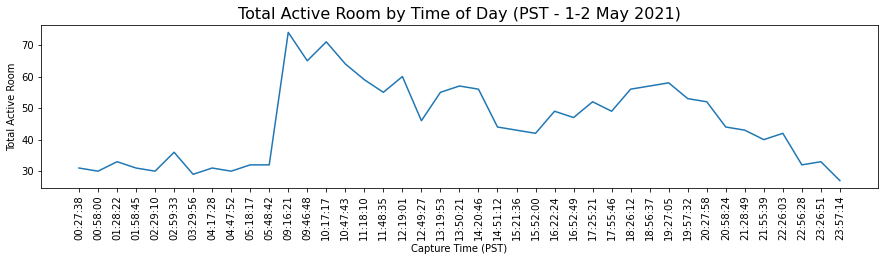

In [43]:
f, ax = plt.subplots(figsize=(15, 3))

ax = sns.lineplot(x="time_of_day", y="room_name",
#              hue="time_of_day_group",
             data=df_room_by_time.sort_values(by=['time_of_day']))

plt.xticks(rotation=90)
plt.title("Total Active Room by Time of Day (PST - 1-2 May 2021)", fontsize=16)
plt.xlabel("Capture Time (PST)")
plt.ylabel("Total Active Room")
plt.show()

In [27]:
df_all["time_of_day"] = df_all["capture_time_pst"].astype(str).str[11:19]

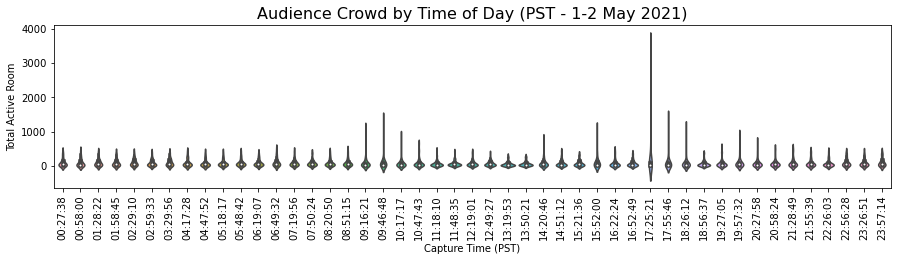

In [44]:
f, ax = plt.subplots(figsize=(15, 3))

ax = sns.violinplot(x="time_of_day", y="joiner_cnt",
#              hue="time_of_day_group",
             data=df_all.sort_values(by=['time_of_day']))

plt.xticks(rotation=90)
plt.title("Audience Crowd by Time of Day (PST - 1-2 May 2021)", fontsize=16)
plt.xlabel("Capture Time (PST)")
plt.ylabel("Total Active Room")
plt.show()

Text(0.5, 1.0, 'Overall Clubhouse Audience Crowd')

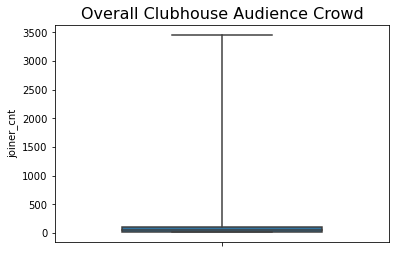

In [33]:
sns.boxplot(y="joiner_cnt", data=df_all,
            whis=[0, 100], width=.6)
plt.title("Overall Clubhouse Audience Crowd", fontsize=16)

In [34]:
df_all.joiner_cnt.describe()

count    2145.000000
mean       91.305361
std       138.464573
min        11.000000
25%        24.000000
50%        48.000000
75%       103.000000
max      3460.000000
Name: joiner_cnt, dtype: float64

In [58]:
df_all.joiner_cnt.quantile(0.9)

212.60000000000014

In [98]:
df_all.joiner_cnt.quantile(0.95)

320.0

In [59]:
df_all.joiner_cnt.quantile(0.99)

479.3599999999997

In [63]:
df_all.joiner_cnt.quantile(0.999)

1346.0400000000477

In [50]:
def custom_round(x, base=5):
    return int(base * round(float(x)/base))

In [52]:
df_audience = pd.DataFrame(df_all.groupby(['joiner_cnt'], as_index=False)["room_name"].nunique())
df_audience['joiner_cnt_round'] = pd.Series(df_audience.joiner_cnt.to_list()).apply(lambda x: custom_round(x, base=5))

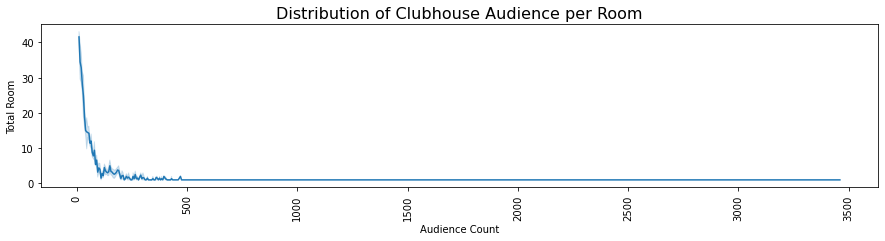

In [57]:
f, ax = plt.subplots(figsize=(15, 3))

ax = sns.lineplot(x="joiner_cnt_round", y="room_name",
             data=df_audience)

plt.xticks(rotation=90)
plt.title("Distribution of Clubhouse Audience per Room", fontsize=16)
plt.xlabel("Audience Count")
plt.ylabel("Total Room")
plt.show()

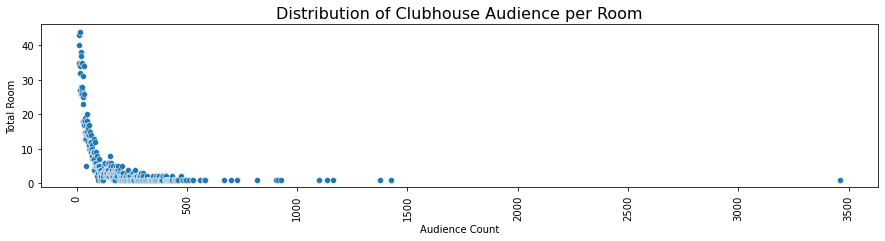

In [55]:
f, ax = plt.subplots(figsize=(15, 3))

ax = sns.scatterplot(x="joiner_cnt", y="room_name",
             data=pd.DataFrame(df_all.groupby(['joiner_cnt'], as_index=False)["room_name"].nunique()))

plt.xticks(rotation=90)
plt.title("Distribution of Clubhouse Audience per Room", fontsize=16)
plt.xlabel("Audience Count")
plt.ylabel("Total Room")
plt.show()

In [17]:
df_room_by_time = pd.DataFrame(df_all.groupby(['capture_time','time_of_day_group'], as_index=False)["joiner_cnt"].mean()).sort_values(by=['capture_time'])
df_room_by_time["capture_time"] = df_room_by_time["capture_time"].astype(str)
df_room_by_time["time_of_day"] = df_room_by_time["capture_time"].str[11:19]
df_room_by_time

,capture_time,time_of_day_group,joiner_cnt,time_of_day
0,2021-05-02 00:16:21,morning,87.351351,00:16:21
1,2021-05-02 00:46:48,morning,107.353846,00:46:48
2,2021-05-02 01:17:17,morning,82.281690,01:17:17
3,2021-05-02 01:47:43,morning,85.453125,01:47:43
4,2021-05-02 02:18:10,morning,72.000000,02:18:10
5,2021-05-02 02:48:35,morning,73.472727,02:48:35
6,2021-05-02 03:19:01,morning,83.733333,03:19:01
7,2021-05-02 03:49:27,morning,82.108696,03:49:27
8,2021-05-02 04:19:53,morning,65.327273,04:19:53
9,2021-05-02 04:50:21,morning,70.456140,04:50:21


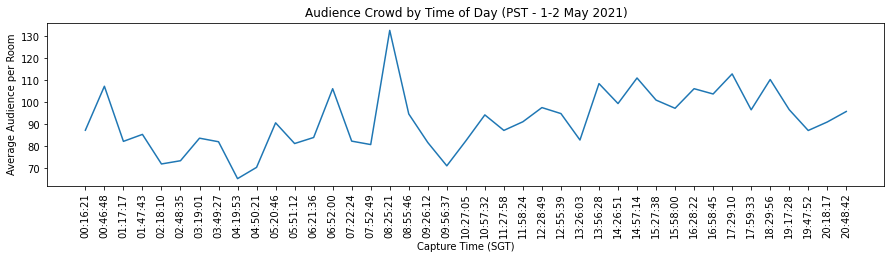

In [19]:
f, ax = plt.subplots(figsize=(15, 3))

ax = sns.lineplot(x="time_of_day", y="joiner_cnt",
#              hue="time_of_day_group",
             data=df_room_by_time)

plt.xticks(rotation=90)
plt.title("Audience Crowd by Time of Day (PST - 1-2 May 2021)")
plt.xlabel("Capture Time (SGT)")
plt.ylabel("Average Audience per Room")
plt.show()

In [68]:
df_room_unique = pd.DataFrame(df_all.groupby(['room_name','club_name'], as_index=False)["joiner_cnt"].max())

In [107]:
df_room_unique[df_room_unique["joiner_cnt"] > 500].sort_values(by=['joiner_cnt'], ascending=False)

,room_name,club_name,joiner_cnt
330,Virtual Dinner Party 🎈,FELICIA'S VIRTUAL DINNER PARTY 🏠,3460
2,#CHUnited4India COVID19 SOS,WE THE FUTURE (WTF) 🏠,1377
323,UPDATE on WTH Happening in India,+1,1135
71,CryptoVoxels Pizza Party 🥳🍕🏴‍☠️🌈 RarePizzas.shop,PIZZADAO 🏠,1100
306,The Kid’s Table 🎈: Virtual Dinner Party,CRAZY GOOD FUN 🏠,926
159,Introducing $WILD token for NFTs in the Metaverse,WILDER WORLD 🏠,817
119,Hanging with Hip Hop Harry 🔴,HIP HOP HARRY CLUB 🏠,581
457,🥊NFT Drop of the Century Muhammad Ali🥊 with Gr...,ETHERNITY CLUB 🏠,579
185,Luvelli : Ape 👑 🦍,BORED APE YACHT CLUB 🏠,511


# Room Duration

In [104]:
df_room_duration = pd.DataFrame(df_all.groupby(['room_name','club_name'], as_index=False)["duration"].max())
df_room_duration['duration_second'] = (df_room_duration["duration"].astype(str).str[0:2].astype(np.int64)*3600) + (df_room_duration["duration"].astype(str).str[3:5].astype(np.int64)*60) + (df_room_duration["duration"].astype(str).str[6:8].astype(np.int64))

df_room_duration

,room_name,club_name,duration,duration_second
0,"""ToTheLighthouse"": Open Meeting about Higher P...",THE 12 STEPS 🏠,00:04:27,267
1,#19 AhkâmHouse: Bilmediğimiz Konuda Ahkâm Kesi...,20 SANİYEDE BİLGİ 🏠,00:01:12,72
2,#CHUnited4India COVID19 SOS,WE THE FUTURE (WTF) 🏠,05:58:44,21524
3,#CHUnited4India SOS Comedy Hour,WE THE FUTURE (WTF) 🏠,02:29:03,8943
4,#TwitterLaufGruppe 🏃🏾🏃‍♀️💨 X Clubhouse 🎧♥️,#TWITTERLAUFGRUPPE 🏠,00:57:39,3459
5,$ 200 plus free style Saturday 🤔🎶🎼 chill vibe ...,GOOD VIBRATIONS 🏠,01:53:55,6835
6,$50 Song Review Room! Let me hear what you got!,RESPECTFULLY JUHURRRRRD 🏠,00:46:47,2807
7,"1 Minute News🎙Share Top Stories, Vote for More...",NEWS NEWS NEWS 🏠,01:47:29,6449
8,10 besten Rhetorik Tipps von Top-Speaker*innen,RHETORIK 🏠,00:37:16,2236
9,24/7 || non sleep 💤,ՔՆԵԼՈՒ ROOM 🏠,09:04:09,32649


Text(0.5, 1.0, 'Overall Clubhouse Room Duration')

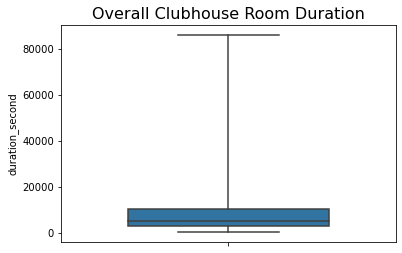

In [109]:
sns.boxplot(y="duration_second", data=df_room_duration,
            whis=[0, 100], width=.6)
plt.title("Overall Clubhouse Room Duration", fontsize=16)

In [84]:
df_room_duration.duration_second.describe()

count      465.000000
mean      9799.131183
std      14097.581030
min         45.000000
25%       2780.000000
50%       5105.000000
75%      10062.000000
max      86071.000000
Name: duration_second, dtype: float64

In [88]:
df_room_duration.duration_second.quantile(0.9)

22477.000000000007

In [108]:
df_room_duration[df_room_duration["duration_second"] > 18000].sort_values(by=['duration_second'], ascending=False).head(15)

,room_name,club_name,duration,duration_second
423,🏠Ruang Tengah,BINCANG TENGAH MALAM 🏠,23:54:31,86071
377,❤️DATING GAME + SHOOT UR SHOT w/ the Sexiest S...,SINGLE IN THE CITY 🏠,23:52:02,85922
18,AllDayDreamingRadio: CoDreaming ProductiveBeat...,ALL DAY DREAMING 🏠,23:47:23,85643
414,🎶music for the quiet moments of the day and th...,K-CLUB MUSIC 🏠,23:20:44,84044
165,It’s what you repeat to yourself that is the c...,OUR MINDSET 🏠,23:12:54,83574
425,👸🏻 eNETWORKING OVERNIGHT WEEKEND PARTY!🎶 live ...,ENETWORKING CLUB 🏠,20:14:32,72872
148,How to run a Successful Business! Come in Spea...,WHAT IT TAKES TO RUN A 1 MILLION DOLLAR BIZ 🏠,19:50:53,71453
461,🦜🤫 STICKY BEAK MEET AND GREET📖👀🔗LOOK AROUND YO...,STICKY BEAK 🏠,19:34:30,70470
437,📸 Create & Chill 🌴,BEHIND THE LENS 🏠,19:29:24,70164
417,🎹soulbeats,K-CLUB MUSIC 🏠,17:33:16,63196


In [91]:
df_room_duration['duration_round'] = pd.Series(df_room_duration.duration_second.to_list()).apply(lambda x: custom_round(x, base=600))
df_duration = pd.DataFrame(df_room_duration.groupby(['duration_round'], as_index=False)["room_name"].nunique())

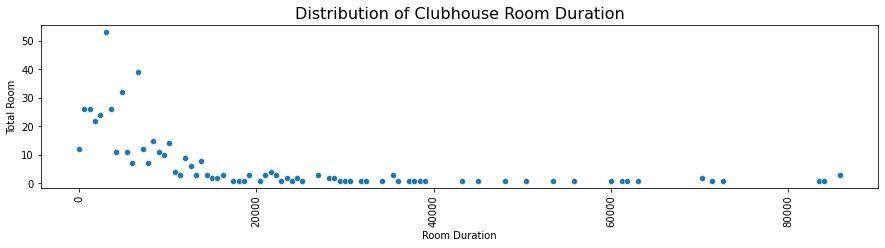

In [112]:
f, ax = plt.subplots(figsize=(15, 3))

ax = sns.scatterplot(x="duration_round", y="room_name",
             data=df_duration)

plt.xticks(rotation=90)
plt.title("Distribution of Clubhouse Room Duration", fontsize=16)
plt.xlabel("Room Duration")
plt.ylabel("Total Room")
plt.show()

In [110]:
df_all['duration_second'] = (df_all["duration"].astype(str).str[0:2].astype(np.int64)*3600) + (df_all["duration"].astype(str).str[3:5].astype(np.int64)*60) + (df_all["duration"].astype(str).str[6:8].astype(np.int64))

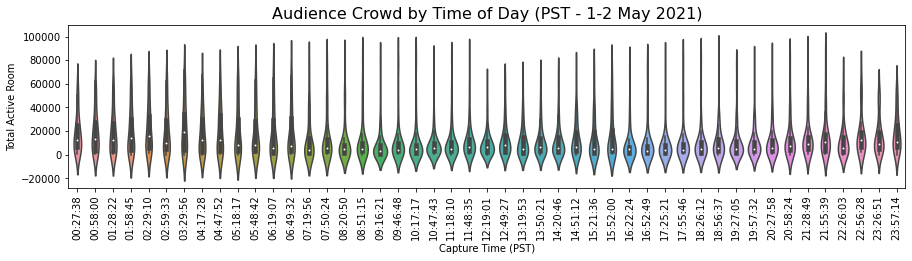

In [111]:
f, ax = plt.subplots(figsize=(15, 3))

ax = sns.violinplot(x="time_of_day", y="duration_second",
#              hue="time_of_day_group",
             data=df_all.sort_values(by=['time_of_day']))

plt.xticks(rotation=90)
plt.title("Room Length by Time of Day (PST - 1-2 May 2021)", fontsize=16)
plt.xlabel("Capture Time (PST)")
plt.ylabel("Room Discussion Duration")
plt.show()